In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

## Generate graph with 100 vertices and 200 edges

In [85]:
def generate_matrix(nodes=100, edges=200):    
    matrix = np.zeros((nodes,nodes), dtype=int)

    for _ in range(edges):
        x = np.random.randint(nodes)
        y = np.random.randint(nodes)
        if x != y and matrix[x, y] == 0:
            matrix[x, y] = 1
            matrix[y, x] = 1
    
    return matrix

In [ ]:
nmatrix = generate_matrix(100, 200)
matrix_df = pd.DataFrame(nmatrix)
matrix_df.to_csv('matrix.csv', index=False)

In [372]:
matrix_df.shape

(100, 100)

### Adjacency Matrix

In [204]:
matrix_df = pd.read_csv('matrix.csv')
print(matrix_df.iloc[:15, :15])

    0  1  2  3  4  5  6  7  8  9  10  11  12  13  14
0   0  0  0  0  0  0  1  0  0  0   0   0   0   0   0
1   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
2   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
3   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
4   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
5   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
6   1  0  0  0  0  0  0  0  0  0   0   0   0   0   0
7   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
8   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
9   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
10  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
11  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
12  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
13  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
14  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0


### Graph Visualization 

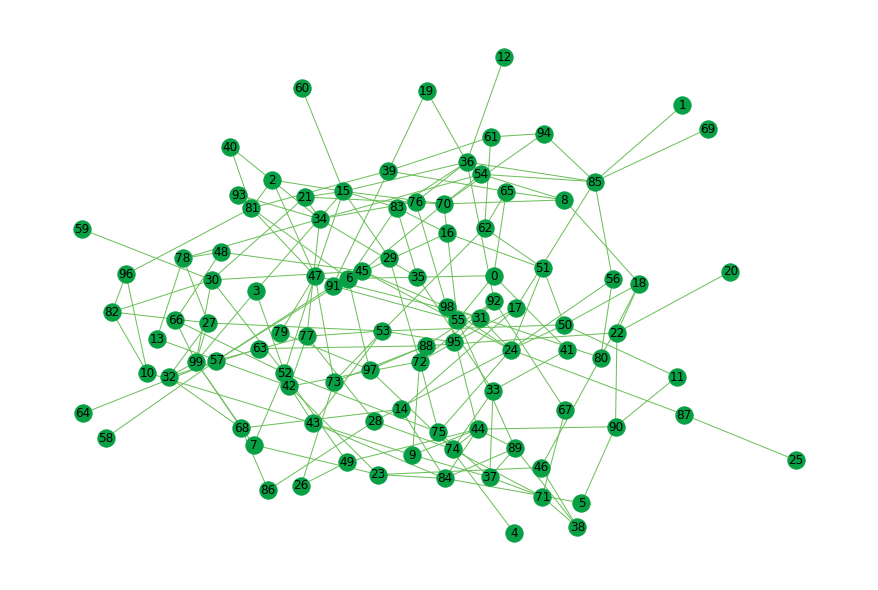

In [367]:
G = nx.from_numpy_matrix(nmatrix)
plt.figure(figsize=(12,8))
nx.draw(G, node_color='#08A045', edge_color='#6BBF59', with_labels=True)
# plt.show()

### Adjacency List

In [368]:
for i, adj in enumerate(nx.generate_adjlist(mG)):
    if i < 15:
        print(adj)

0 6 41 55 65
1 85
2 15 47 81
3 15 42 99
4 75
5 84 90
6 16 57 81 83 97
7 23 52 99
8 18 54 65 70
9 37 43 44 72
10 43 82 96
11 50 90
12 36
13 42 78
14 17 68 84


## DFS and BFS

In [369]:
def connected_component(graph):
    nodes = list(graph.nodes())
    visited = []
    connected = []

    for node in nodes:
        component = []
        visited, component = traverse(graph, node, visited, component)
        if len(component) > 0:
            connected.append(component)
    
    return connected

def traverse(graph, root, visited, component):
    if root in visited:
        return visited, component
    
    visited.append(root)
    component.append(root)

    for node in graph.neighbors(root):
        visited, component = traverse(graph, node, visited, component)

    return visited, component

In [370]:
connected = connected_component(mG)
print(f' total connected component: {len(connected)}')
print(f' connected component: {(connected)}')

 total connected component: 1
 connected component: [[0, 6, 16, 51, 24, 28, 74, 33, 35, 34, 21, 15, 2, 47, 31, 80, 18, 8, 54, 70, 45, 30, 52, 7, 23, 42, 3, 99, 27, 32, 63, 88, 22, 20, 90, 5, 84, 14, 17, 72, 9, 37, 71, 38, 46, 89, 44, 49, 26, 73, 53, 43, 10, 82, 96, 81, 39, 19, 36, 12, 76, 98, 83, 85, 1, 56, 69, 94, 61, 62, 65, 92, 67, 95, 91, 55, 57, 58, 64, 77, 40, 50, 11, 75, 4, 29, 68, 86, 97, 79, 78, 13, 48, 66, 59, 93, 60, 41, 87, 25]]


In [371]:
nx.shortest_path(mG, 4, 58)

[4, 75, 24, 28, 77, 57, 58]